<a href="https://colab.research.google.com/github/instateMx/Modelos_Reportes_CIS/blob/main/ModelosMLPredPrecios_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random Forest Regression**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving revfin.csv to revfin.csv


In [ ]:
import io
data_df = pd.read_csv(io.BytesIO(uploaded['revfin.csv']))

In [ ]:
data_df.describe()

,bedroom,m2_construidos,m2_terreno,precio/m2,cus
count,530.000000,530.000000,530.000000,530.000000,530.000000
mean,2.194340,94.509434,109.579245,6019.630189,0.909245
std,0.683291,54.514708,62.819139,2437.496410,0.399302
min,1.000000,35.000000,25.000000,357.000000,0.100000
25%,2.000000,60.000000,74.000000,4274.000000,0.700000
50%,2.000000,81.000000,97.500000,6000.000000,0.900000
75%,3.000000,110.000000,120.000000,8299.500000,1.000000
max,5.000000,397.000000,771.000000,10000.000000,5.600000


In [ ]:
data_df = data_df.drop(['imgslink','imagen','ubicacion','Ancho cuarto','price','Antiguedad','Niveles','Alto','Ancho','Largo terreno','Largo construccion'], axis =1)
data_df.head()

In [ ]:
x = data_df.drop(['precio/m2'], axis=1).values
y = data_df['precio/m2'].values

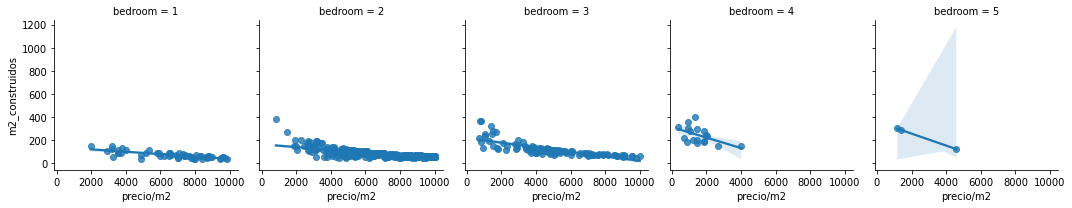

In [ ]:
g = sns.lmplot(x='precio/m2' , y = 'm2_construidos', col = 'bedroom' ,data = data_df, height = 3)

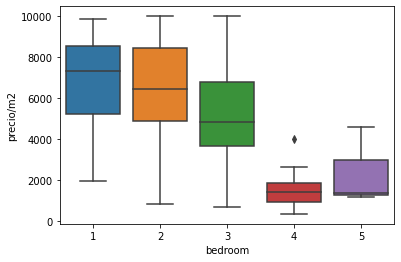

In [ ]:
data_df = data_df[data_df['bedroom'] < 2000]
g = sns.boxplot(x='bedroom' , y = 'precio/m2',data = data_df)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 50, random_state = 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

In [ ]:
y_pred = rfr.predict(X_test)

In [ ]:
y_pred

array([6395.65862764, 8477.26666667, 1330.66      , 8381.06      ,
       7980.85333333, 6043.04950306, 4224.95152958, 4224.95152958,
       6191.34666667, 7914.39485714, 6043.04950306, 8834.9       ,
       8760.96      , 2863.14      , 6014.41333333, 8846.86      ,
       1229.42      , 7129.7       , 4805.2342381 , 5324.15438977,
       8715.12      , 8843.40857143, 5344.79      , 4358.76      ,
       5449.29754978, 1948.8       , 1347.32      , 4707.6152381 ,
       1758.96      , 8069.51309524, 1064.9       , 8715.12      ,
       5693.32      , 4615.35333333, 9089.272     , 8678.74      ,
       9214.52571429, 8466.785     , 3921.76      , 5082.01365368,
       6043.04950306, 9070.72      , 3909.6       , 2346.576     ,
       4183.36      , 5273.97996257, 2863.14      , 8341.06      ,
       6277.09642857, 9052.215     , 4671.16      , 5313.94      ,
       8352.5       , 2117.375     , 8238.54833333, 5646.8       ,
       7369.9362619 , 6043.04950306, 2722.672     , 6907.93714

In [ ]:
y_test

array([ 7092,  9615,   917,  9423,  7300,  6619,  3567,  4986,  4306,
        4889,  5851,  7955,  4800,  2667,  7568,  9042,   357,  9091,
        5343,  5015,  9557,  9483,  7500,  3450,  6783,  2966,  1483,
        3166,  1996,  8634,   682,  8404,  3735,  6087,  5321,  8909,
        9167,  7433,  2917,  3091,  6974,  4872,  3414,   816,  3527,
        5238,  2667,  9615,  7748,  9818,  7049,  6095,  9761,  3191,
        9821,  6533,  8536,  4846,  1967,  4815,  5429,  2026,  1060,
        1475,  3693,  9375,  6048,  5609,  4025,  8333,  3032,  5067,
        7092,  6206,  4631,  5021,  8654,  2616,  3805,  5917,  1862,
        6035,  1481,  5569,  5319,  7429,  8000,  5321,  6729,  8850,
        6901,  4295, 10000,  2667,  1335,  5942,  6848,  9649,  6010,
        7571,  3077,  8733,  6039,  4876,  3246,  3412])

In [ ]:
rfrScore = round(rfr.score(X_train, y_train)*100)
print('Eficacia del modelo:', rfrScore, '%')


Eficacia del modelo: 93 %


# **Decision Tree Regression**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn import tree
dtr = tree.DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_dtr = dtr.predict(X_test)
y_pred_dtr

array([4267.        , 6848.        , 5132.71428571, 9524.        ,
       9615.        , 4006.        , 7300.        , 3239.        ,
       5132.71428571, 1167.        , 4148.8       , 3725.        ,
       2667.        , 3091.        , 5132.71428571, 6031.1       ,
       3239.        , 6031.1       , 7432.        , 2250.        ,
       8553.5       , 8634.        , 5429.        , 7102.        ,
       6113.33333333, 9091.        , 6190.        , 6501.        ,
       4179.        , 6105.        , 3032.        , 9982.        ,
       4728.        , 9564.        , 5180.        , 5021.        ,
       8634.        , 9167.        , 5132.71428571, 6230.        ,
       3000.        , 5238.        , 8974.66666667, 9042.        ,
       6087.        , 6031.1       , 8462.        , 5625.        ,
       6949.        , 8553.5       , 4571.85714286, 9444.        ,
       8657.        , 7568.        , 4432.5       , 6031.1       ,
       5380.        , 7429.        , 7432.        , 6113.33333

In [ ]:
y_test

array([ 4267,  7422,  5572,  9750,  9038,  5851,  7300,  1310,  6028,
        1843,  4876,  4486,  2667,  5343,  5481,  6619,  2079,  5437,
        8511,   820,  6500,  9127,  8429,  3246,  5155,  8955,  4444,
        7092,  3313,  3693,  2724,  8793,  4644,  9855,  3166,  5645,
        9375,  8424,  5775,  9127,   965,  5238,  8923,  4800,  5714,
        5792,  9576,  6520,  7748,  7500,  3812,  8333,  8657,  6620,
        3989,  7033,  7523,  6901,  8511,  4953,  7102,  2616,  3592,
        7866,  9375,  1368,  5834,  8571,  3412,  4653,  4859,  9719,
        7640,  8667,  1860,  3799,  5984,  9917,  8317,  5792,  9490,
        6738,  7153,  8663,  5409,  6075,  5319,  8827,  4965, 10000,
        8283,  9000,  1996,  5000,  7818,  6486,  9483, 10000,  4025,
        4701,  4559,  5319,  3750,  3805, 10000,  6028])

In [ ]:
#dtrScore = round(dtr.score(X_train, y_train)*100)
#print("Eficacia del modelo: ", dtrScore)

dtr.score(X_train, y_train)

0.9627080000258573

# **Gráficas**

In [ ]:
import seaborn as sns
data_df = pd.read_csv('revfin.csv', index_col=0)
data_df = data_df.drop(['imgslink','imagen','ubicacion','Ancho cuarto','Alto'], axis =1)
data_df = data_df[data_df['Ancho'] < 11]
data_df = data_df[data_df['Largo construccion'] < 35]
data_df = data_df[data_df['Largo terreno'] < 35]
data_df.loc[data_df['Antiguedad'] == 1, 'Antiguedad'] = 'Vieja'
data_df.loc[data_df['Antiguedad'] == 0, 'Antiguedad'] = 'Nueva'
data_df.head()

,bedroom,m2_construidos,m2_terreno,precio/m2,Ancho,Niveles,Antiguedad,Largo terreno,Largo construccion
price,,,,,,,,,
600000,3,67,43,8955,3.90,2,Vieja,11.03,17.18
240000,2,50,85,4800,5.36,1,Vieja,15.86,9.33
400000,2,48,72,8333,5.88,2,Nueva,12.24,8.16
600000,2,190,95,3158,5.80,2,Vieja,16.38,32.76
600000,3,66,40,9091,9.05,2,Nueva,4.42,7.29


**Largo de terreno vs largo de la construccion**

Text(0, 0.5, 'Largo construción')

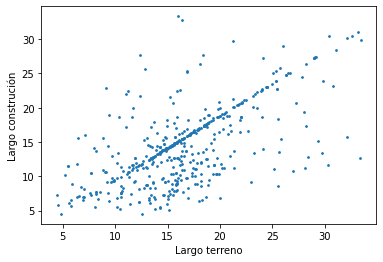

In [ ]:
x = data_df['Largo terreno']
y = data_df['Largo construccion']
plt.scatter(x, y, s = 3, vmax = 60)
plt.xlabel('Largo terreno')
plt.ylabel('Largo construción')

**Largo del terreno vs Ancho**

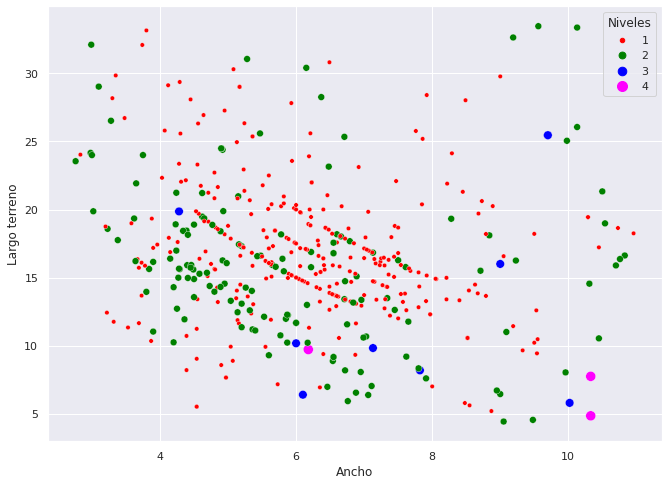

In [ ]:
sns.set(rc={'figure.figsize':(11,8)})
pal = ['red','green','blue','magenta']
sns.scatterplot(data=data_df, x="Ancho", y="Largo terreno", hue="Niveles", size="Niveles", sizes = (20, 100), palette=pal)

**Largo de la construccion vs Ancho**

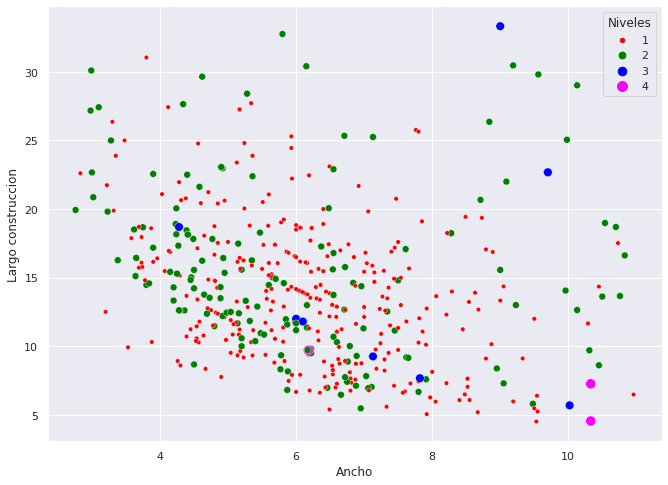

In [ ]:
sns.set(rc={'figure.figsize':(11,8)})
sns.scatterplot(data=data_df, x="Ancho", y="Largo construccion", hue="Niveles", size="Niveles", sizes = (20, 100), palette=pal )


**Niveles y Antiguedad**

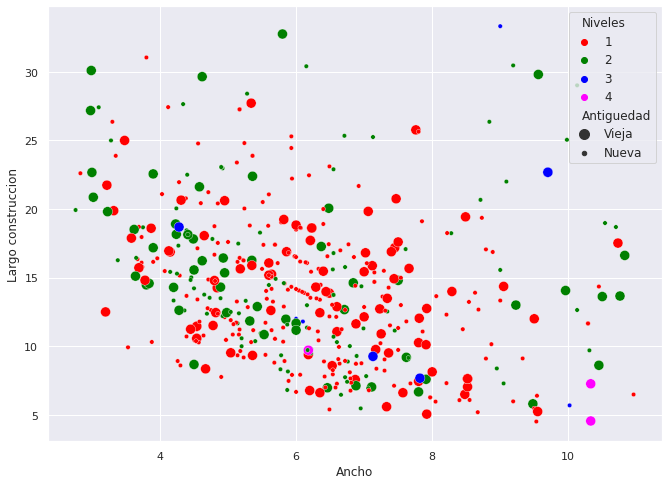

In [ ]:
sns.set(rc={'figure.figsize':(11,8)})
#pal = ['red','blue']
sns.scatterplot(data=data_df, x="Ancho", y="Largo construccion", hue="Niveles", size="Antiguedad", sizes = (20, 100), palette=pal )


**Numero de casas por nivel y antiguedad**

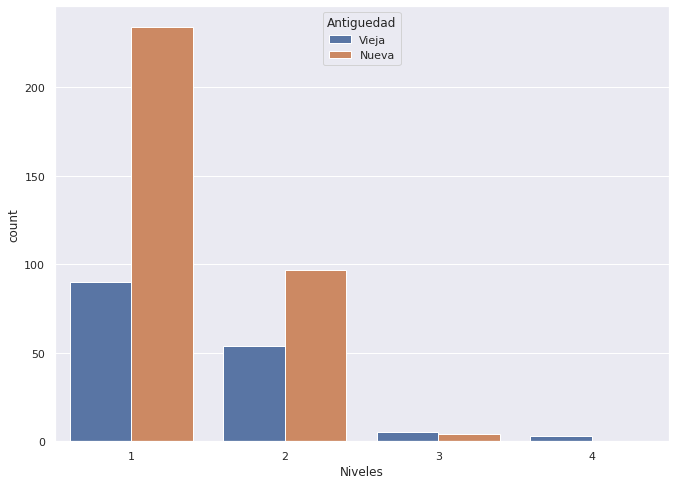

In [ ]:
sns.countplot(x="Niveles", hue="Antiguedad", data=data_df)

**Largo construccion vs Ancho por Antiguedad**

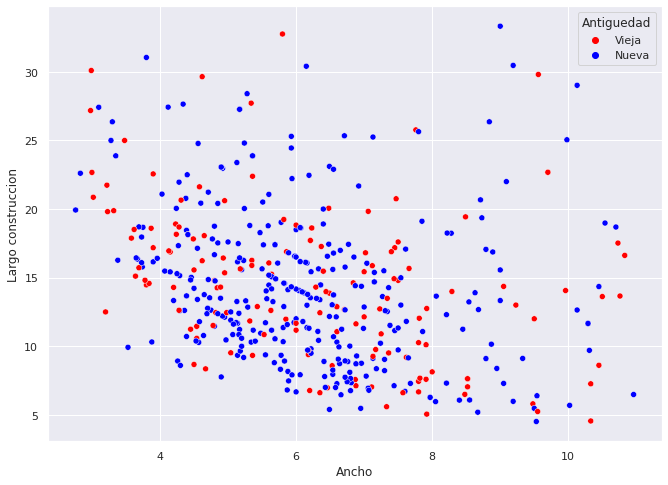

In [ ]:
sns.scatterplot(data=data_df, x="Ancho", y="Largo construccion", hue="Antiguedad", sizes = (20, 100), palette=['red','blue'] )


**Clusters**

In [ ]:
from sklearn.cluster import KMeans as KMeans

dfcls = pd.read_csv('revfin.csv')
dfClusters = dfcls.drop(['precio/m2','imgslink','imagen','ubicacion','Ancho cuarto','Alto','Antiguedad','Niveles','Largo construccion', 'price', 'bedroom', 'm2_construidos','m2_terreno'], axis=1)
dfClusters = dfClusters[dfClusters['Ancho'] < 10]
dfClusters = dfClusters[dfClusters['Ancho'] > 2.7]
#dfClusters = dfClusters[dfClusters['Largo construccion'] < 25]
dfClusters = dfClusters[dfClusters['Largo terreno'] < 25]
kmeans = KMeans(n_clusters=30)
m_10 = kmeans.fit(dfClusters)
dfClusters.head()

,Ancho,Largo terreno
0,3.90,11.03
1,5.36,15.86
2,5.88,12.24
3,5.80,16.38
5,9.05,4.42


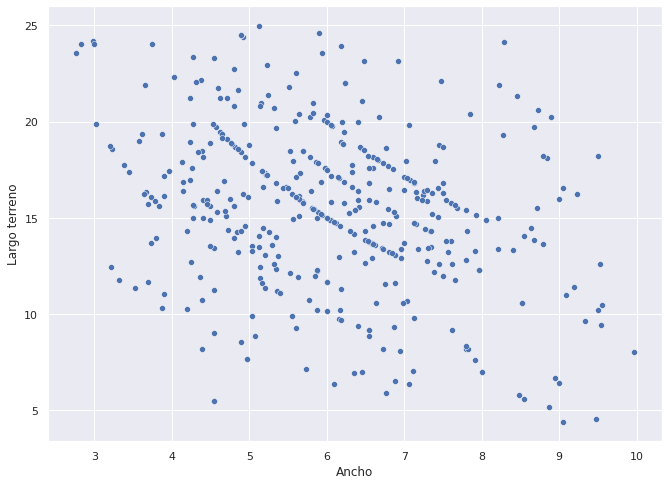

In [ ]:
sns.set(rc={'figure.figsize':(11,8)})
#pal = ['red','blue']
sns.scatterplot(data=dfClusters, x="Ancho", y="Largo terreno", sizes = (20, 100), palette=pal )

In [ ]:
results = pd.DataFrame({'Ancho' : dfClusters.iloc[:, 0], 'Largo terreno': dfClusters.iloc[:,1]})
results['group'] = m_10.labels_
results['group'] = results.group.astype(str)

results

,Ancho,Largo terreno,group
0,3.90,11.03,28
1,5.36,15.86,6
2,5.88,12.24,7
3,5.80,16.38,6
5,9.05,4.42,2
...,...,...,...
525,5.17,17.41,11
526,5.60,17.14,3
527,4.85,18.56,5
528,5.70,15.79,6


In [ ]:
centroids = pd.DataFrame({'Ancho' : m_10.cluster_centers_[:,0], 'Largo terreno' : m_10.cluster_centers_[:,1]})
centroids['group'] = "C"
concatenado = pd.concat([results, centroids])

centroids

,Ancho,Largo terreno,group
0,6.702308,13.467692,C
1,6.681250,22.620000,C
2,9.042500,5.838750,C
3,6.118636,17.428182,C
4,6.579333,9.784667,C
5,4.335000,19.085417,C
6,5.496842,16.177368,C
7,5.575294,11.791176,C
8,4.782500,9.790000,C
9,8.382000,13.622000,C


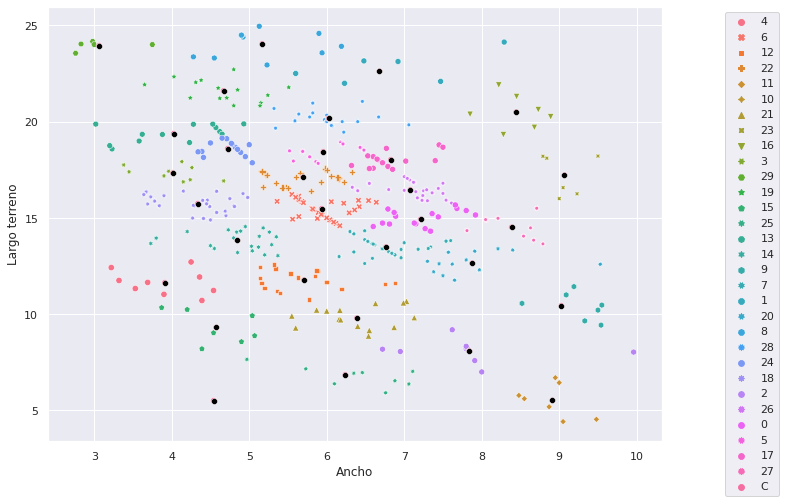

<Figure size 3000x1500 with 0 Axes>

In [ ]:
sns.set_theme()
sns.scatterplot(x='Ancho', y='Largo terreno', data=concatenado, hue="group", s=40, style="group")
sns.scatterplot(x='Ancho', y='Largo terreno', data=centroids,color="00")
plt.legend(ncol=1, loc='upper right', bbox_to_anchor=(1.2, 1))
plt.figure(figsize=(30, 15), dpi=100)
plt.savefig('pic.eps', format='eps', dpi=1000)

In [ ]:
from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(5,21))

visualizer.fit(dfClusters2)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

**Clusters con 9 centroides e informacion reducida**

In [ ]:
dfcls2 = pd.read_csv('revfin.csv')
dfClusters2 = dfcls2.drop(['precio/m2','imgslink','imagen','ubicacion','Ancho cuarto','Alto','Antiguedad','Niveles','Largo construccion', 'price', 'bedroom', 'm2_construidos','m2_terreno'], axis=1)
dfClusters2 = dfClusters2[dfClusters2['Ancho'] < 8]
dfClusters2 = dfClusters2[dfClusters2['Ancho'] > 5]
#dfClusters2 = dfClusters2[dfClusters2['Largo construccion'] < 25]
dfClusters2 = dfClusters2[dfClusters2['Largo terreno'] < 20]
dfClusters2 = dfClusters2[dfClusters2['Largo terreno'] > 10]
kmeans = KMeans(n_clusters=11)
m_10 = kmeans.fit(dfClusters2)
dfClusters2.head()

,Ancho,Largo terreno
1,5.36,15.86
2,5.88,12.24
3,5.80,16.38
10,5.87,10.22
15,5.77,10.75


In [ ]:
results2 = pd.DataFrame({'Ancho' : dfClusters2.iloc[:, 0], 'Largo terreno': dfClusters2.iloc[:,1]})
results2['group'] = m_10.labels_
results2['group'] = results2.group.astype(str)

results2

,Ancho,Largo terreno,group
1,5.36,15.86,4
2,5.88,12.24,8
3,5.80,16.38,4
10,5.87,10.22,8
15,5.77,10.75,8
...,...,...,...
523,6.09,14.78,4
524,5.93,15.18,4
525,5.17,17.41,0
526,5.60,17.14,0


In [ ]:
centroids2 = centroids
centroids2 = centroids2[centroids2['Ancho'] < 8]
centroids2 = centroids2[centroids2['Ancho'] > 5]
centroids2 = centroids2[centroids2['Largo terreno'] < 20]
centroids2 = centroids2[centroids2['Largo terreno'] > 10]

concatenado2 = pd.concat([results2, centroids2])

In [ ]:
centroids3 = pd.DataFrame({'Ancho' : m_10.cluster_centers_[:,0], 'Largo terreno' : m_10.cluster_centers_[:,1]})
centroids3['group'] = "C"



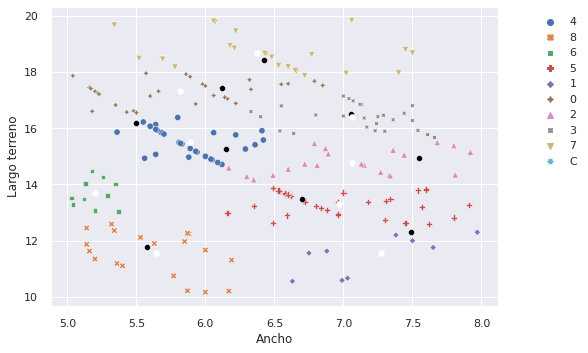

<Figure size 3000x1500 with 0 Axes>

In [ ]:
sns.set_theme()
sns.scatterplot(x='Ancho', y='Largo terreno', data=concatenado2, hue="group", s=40, style="group")
sns.scatterplot(x='Ancho', y='Largo terreno', data=centroids2,color="00")
sns.scatterplot(x='Ancho', y='Largo terreno', data=centroids3,color="01")

plt.legend(ncol=1, loc='upper right', bbox_to_anchor=(1.2, 1))
plt.figure(figsize=(30, 15), dpi=100)
plt.savefig('pic.eps', format='eps', dpi=1000)

**Grafica Elbow**

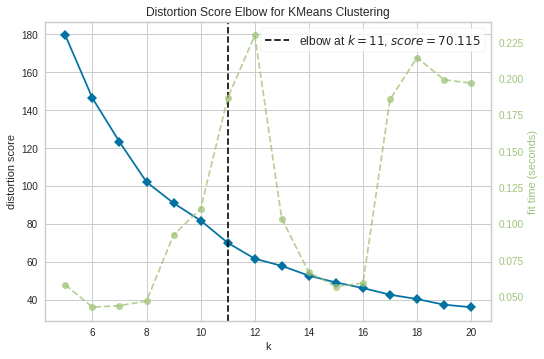

In [ ]:
from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(5,21))

visualizer.fit(dfClusters2)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure